In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 1000)

2023-01-27 16:28:19.635551: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-27 16:28:19.635597: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-27 16:28:21.547598: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-27 16:28:21.547715: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-01-27 16:28:21.547725: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
target = train_data['label']
train_data.drop(columns='label', inplace=True, axis=1)


In [4]:
train_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

In [5]:
train_data.shape

(42000, 784)

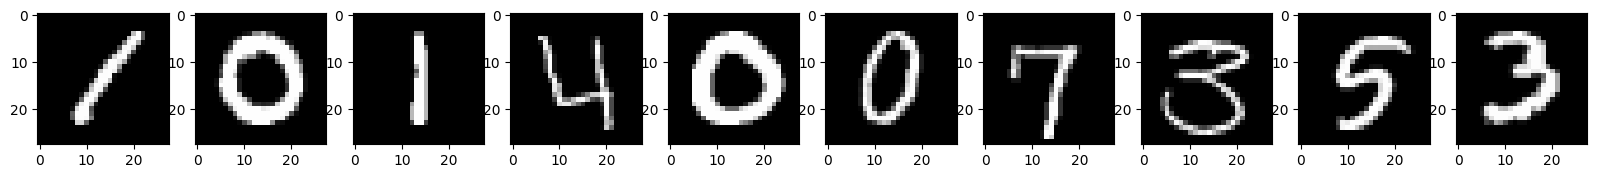

In [6]:


# Set the number of digits to plot
num_digits = 10

# Create a figure and a set of subplots with 1 row and num_digits columns
fig, axs = plt.subplots(1, num_digits, figsize=(20, 20))

# Iterate over the first num_digits digits in the data set
for i in range(num_digits):
    # Select the image data for the i-th digit
    digit_data = train_data.iloc[i, :]
    
    # Reshape the image data into a 28x28 array
    digit_array = digit_data.values.reshape(28, 28)
    
    # Plot the image on the i-th subplot
    axs[i].imshow(digit_array, cmap='gray')

# Show the plot
plt.show()


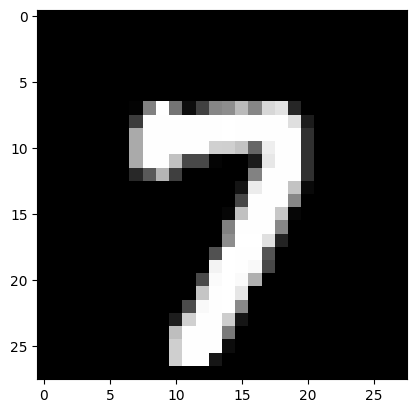

In [11]:
# plot a randome digit
plt.imshow(train_data.iloc[521].values.reshape(28, 28), cmap='gray')
# save the image with 1000 dpi
plt.savefig('digit.png')

## Build Model:

In [31]:

# Define the model
# Define the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Reshape((28, 28, 1), input_shape=(784,)))
model.add(tf.keras.layers.DepthwiseConv2D(kernel_size=(3,3), activation='relu', depth_multiplier=1, input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(10, (3, 3), activation='relu', dilation_rate=(2, 2)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(600, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


# Compile the model with Adam optimization and categorical cross-entropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 depthwise_conv2d_2 (Depthwi  (None, 26, 26, 1)        10        
 seConv2D)                                                       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 1)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 10)          100       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 10)         0         
 2D)                                                             
                                                      

In [33]:
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.1)

# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Train the model
# model.fit(X_train, y_train, epochs=50, batch_size=64)

# Define a callback that stops training when the validation loss stops improving
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model using the early stopping callback
model.fit(X_train, y_train, epochs=40, batch_size=64, validation_data=(X_test, y_test), callbacks=[callback])


In [ ]:
# use the rectified softmax function instead of the softmax function
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [ ]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)


In [35]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss:.4f} Test accuracy: {test_acc:.4f}")

In [ ]:
# Load the test data and make predictions using the model
predictions = model.predict(test_data)
predictions = np.argmax(predictions, axis=1)

# Create a dataframe with the image IDs and the predicted labels
submission = pd.DataFrame({'ImageId': range(1, len(predictions)+1), 'Label': pd.Series(predictions)})

# Save the dataframe to a CSV file
submission.to_csv('submission.csv', index=False)

In [ ]:
pd.read_csv('submission.csv')